# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [3]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import metrics

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [4]:
wine_df= pd.read_csv("winequality-red.csv")
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [5]:
print(wine_df.sample(10))

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1255            6.1             0.640         0.02             2.4      0.069   
560            12.7             0.600         0.49             2.8      0.075   
345             7.0             0.685         0.00             1.9      0.067   
510            12.4             0.420         0.49             4.6      0.073   
314             7.4             0.360         0.29             2.6      0.087   
421             6.6             0.840         0.03             2.3      0.059   
964             8.5             0.470         0.27             1.9      0.058   
1469            7.3             0.980         0.05             2.1      0.061   
1530            6.6             0.440         0.09             2.2      0.063   
907             6.1             0.560         0.00             2.2      0.079   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1255                 26.0      

# Q3 Print the datatypes of each column and the shape of the dataset 

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_df.shape

(1599, 12)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [8]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

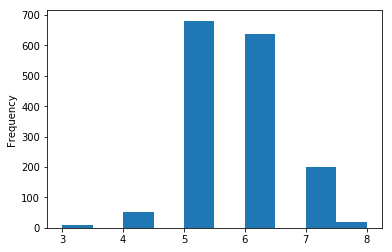

In [9]:
wine_df['quality'].plot.hist();

The quality value with 5 and 6 are maximum.

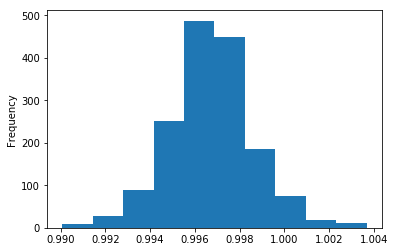

In [10]:
wine_df.density.plot.hist();

Density is almost normally distributed. 

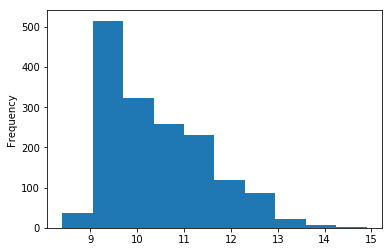

In [11]:
wine_df.alcohol.plot.hist()

This is a right skewed data. 

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


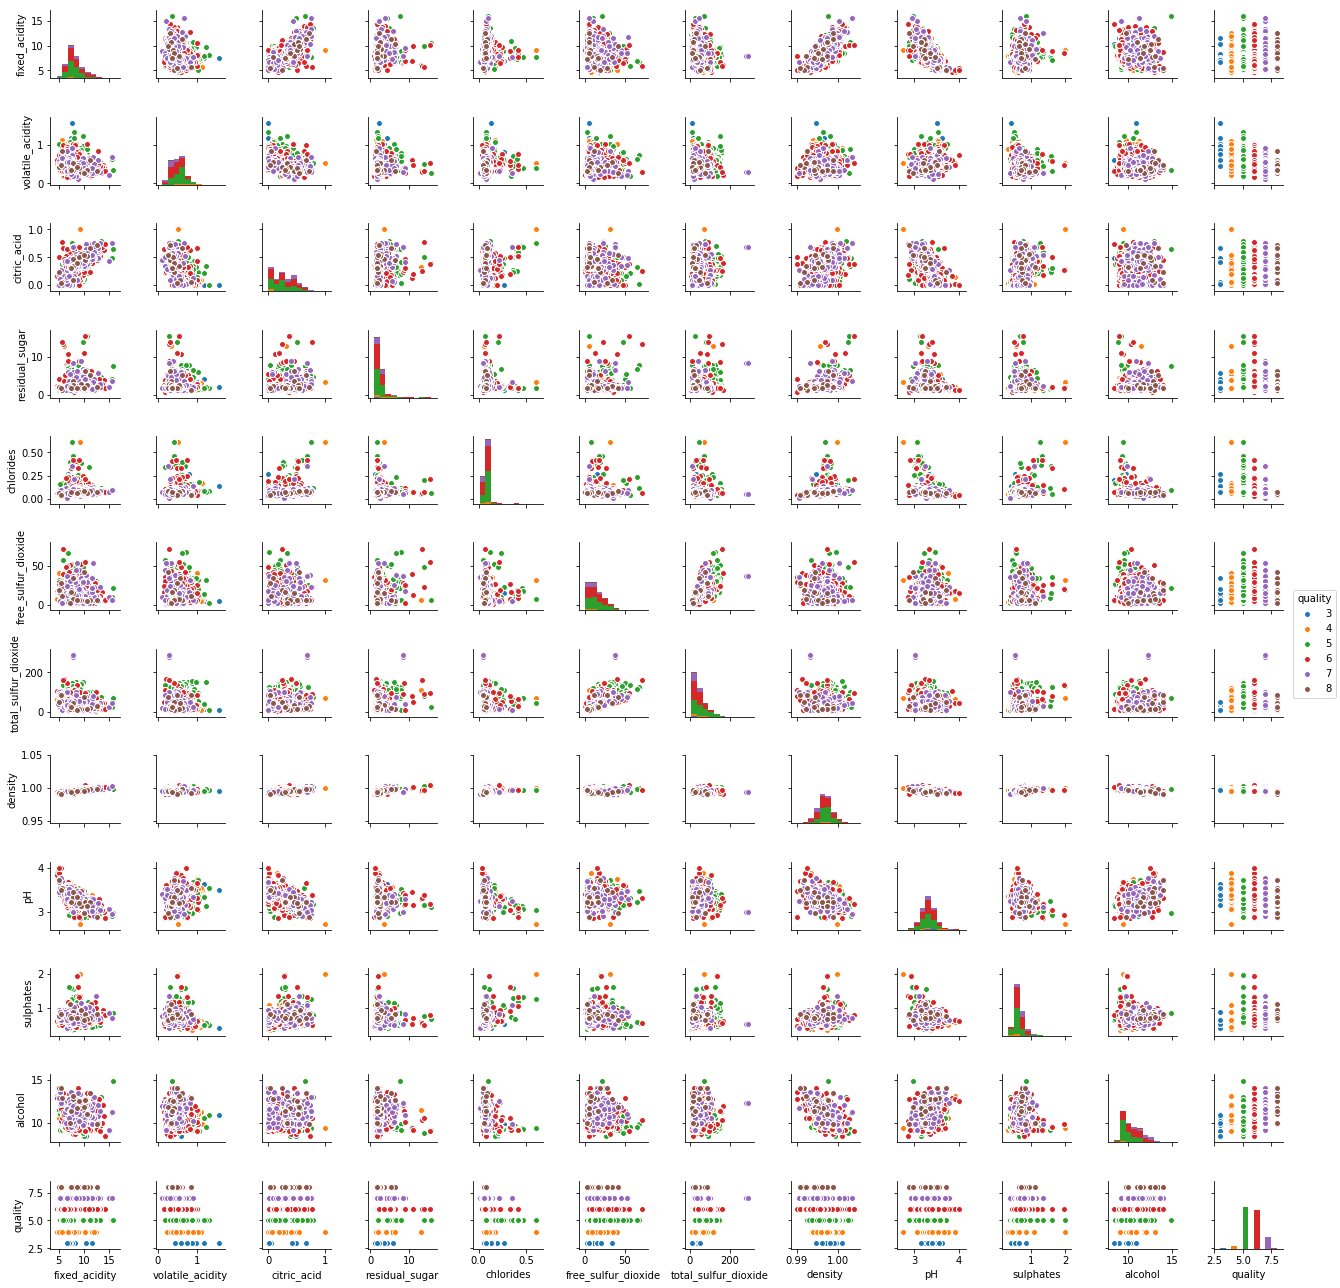

In [12]:
sns.pairplot(wine_df,hue='quality' , size=1.5)

As fixed acidity raises, density raises and ph falls.
Free sulphur dioxide and Total sulphur dioxide are correlated.

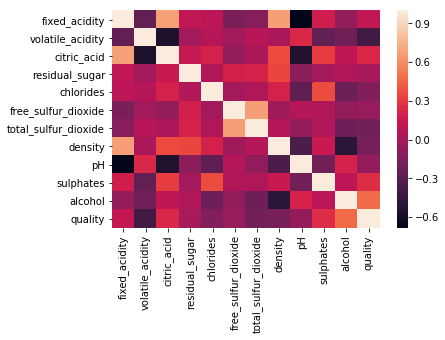

In [13]:
sns.heatmap(wine_df.corr())

# Q7 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [14]:
X= wine_df.drop('quality', axis=1)
Y= wine_df.pop('quality')


In [15]:
#print(X.columns.values)
print(type(Y))

<class 'pandas.core.series.Series'>


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.30)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
y_predict= dt_model.predict(x_test)
print(len(y_predict))
print(len(y_test))
print(len(x_test))
print(len(x_train))
print(x_train.columns)
print(set(y_test))

480
480
480
1119
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
{3, 4, 5, 6, 7, 8}



# Q9 Print the accuracy of the model & print the confusion matrix 

In [19]:
print("Train data score is : ")
print(dt_model.score(x_train , y_train))

print("Test data score is : ")
print(dt_model.score(x_test , y_test))

Train data score is : 
1.0
Test data score is : 
0.6270833333333333


In [20]:
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_predict,labels=[3,4,5,6,7,8]),
                   index=['ActualQ3','ActualQ4','ActualQ5','ActualQ6','ActualQ7','ActualQ8'], 
                   columns=['PreQ3','Q4','Q5','Q6','Q7','Q8']))
print(set(y_test))
print(set(y_predict))

          PreQ3  Q4   Q5   Q6  Q7  Q8
ActualQ3      0   1    1    0   0   0
ActualQ4      0   2    8    2   2   0
ActualQ5      0   4  155   49   8   0
ActualQ6      1   1   54  107  15   2
ActualQ7      0   0    8   16  36   0
ActualQ8      0   0    1    4   2   1
{3, 4, 5, 6, 7, 8}
{3, 4, 5, 6, 7, 8}


[PreQ3,ActualQ5]=1 : It is predicted as Quality 3 but it is actual value is Quality 5
[PreQ5,ActualQ5]=157 : i57 items are predicted as Quality 5, and it is calcualted correctly as Quality 5. 

In [21]:
#d= set(y_test)
#print(d)
#labels=['3','4', '5', '6', '7', '8']
#print(labels)
#labels= y_test
#metrics.confusion_matrix(y_test, y_predict,labels=[3,4,5,6,7,8])
#, labels=[3,4,5,6,7,8]
#print(pd.DataFrame(metrics.confusion_matrix(y_test, y_predict), index=['Q3','Q4','Q5','Q6','Q7','Q8'], columns=['Q3','Q4','Q5','Q6','Q7','Q8']))
#print(metrics.confusion_matrix(y_test, y_predict, labels=set(y_test)))''

# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [22]:
dt_model_max = DecisionTreeClassifier(criterion = 'entropy' , max_depth=9)
dt_model_max.fit(x_train, y_train)
y_predict = dt_model_max.predict(x_test)
print("Train data score is : ")
print(dt_model_max.score(x_train , y_train))
print("Test data score is : ")
print(dt_model_max.score(x_test , y_test))
print("Matrix")
print(metrics.confusion_matrix(y_test, y_predict))
print(set(y_test))
print(set(y_predict))

Train data score is : 
0.8507596067917784
Test data score is : 
0.60625
Matrix
[[  0   2   0   0   0   0]
 [  0   1   9   1   3   0]
 [  0   3 161  50   2   0]
 [  1   1  65  99  13   1]
 [  0   0   6  24  30   0]
 [  0   0   1   4   3   0]]
{3, 4, 5, 6, 7, 8}
{3, 4, 5, 6, 7, 8}


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [24]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))
print(set(y_test))
print(set(y_predict))

0.6854166666666667
[[  0   1   1   0   0   0]
 [  0   0  10   4   0   0]
 [  0   0 171  44   1   0]
 [  0   1  42 129   8   0]
 [  0   0   3  29  28   0]
 [  0   0   0   6   1   1]]
{3, 4, 5, 6, 7, 8}
{4, 5, 6, 7, 8}


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [25]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(x_train, y_train)

y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))
print(set(y_test))
print(set(y_predict))

0.5416666666666666
[[  0   0   1   1   0   0]
 [  0   0  10   4   0   0]
 [  0   0 142  74   0   0]
 [  2   0  60 118   0   0]
 [  0   0   2  58   0   0]
 [  0   0   0   8   0   0]]
{3, 4, 5, 6, 7, 8}
{3, 5, 6}


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [26]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(x_train, y_train)


In [27]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))
print(set(y_test))
print(set(y_predict))

0.6708333333333333
[[  0   1   1   0   0   0]
 [  0   0   8   6   0   0]
 [  0   0 172  42   2   0]
 [  0   1  46 123  10   0]
 [  0   0   3  31  26   0]
 [  0   0   0   5   2   1]]
{3, 4, 5, 6, 7, 8}
{4, 5, 6, 7, 8}


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))
print(set(y_test))
print(set(y_predict))

0.6375
[[  0   1   1   0   0   0]
 [  0   0  10   4   0   0]
 [  1   0 162  50   3   0]
 [  3   0  49 120   8   0]
 [  0   0   5  31  23   1]
 [  0   0   0   5   2   1]]
{3, 4, 5, 6, 7, 8}
{3, 4, 5, 6, 7, 8}


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [29]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('Decision_tree', dt_model),
                                    ('Decision_tree_max', dt_model_max),
                                    ('random_forest', rfcl),
                                    ('ada boost', abcl),
                                    ('Bagging_classifier', bgcl),
                                    ('gradientboost_classifier',gbcl )
                                   ], weights=[1,1,1,1,1,1], voting='soft')
vc = vc.fit(x_train, y_train)
y_predict = vc.predict(x_test)
print(vc.score(x_test , y_test))

0.6645833333333333


E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
